# Problem set 2: Hands on with sustainability models

This problem set will have you work through several sustainability models. To turn this in, please submit a PDF of your completed notebook and upload to the assignment on canvas. There are lots of ways to convert a completed Jupyter Notebook to PDF, including the Export feature in VS Code in the "..." options menu above this notebook. The most robust way is to use Quarto (https://quarto.org/docs/getting-started.html), which I had you install as a VS Code Extension. The easiest way to do that is open up a Command Prompt/Terminal in the folder where your notebook is and type `quarto render problem_set_2.ipynb --to pdf`. This will create a PDF in the same folder as your notebook.


## APEC 8601 Yuheng Du


## Required imports

In [2]:
import os, sys
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dicelib  # https://github.com/mptouzel/PyDICE

import ipywidgets as widgets  # interactive display

plt.style.use(
    "https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle"
)

%matplotlib inline
sns.set_style("ticks", {"axes.grid": False})
params = {"lines.linewidth": "3"}
plt.rcParams.update(params)
display(HTML("<style>.container { width:100% !important; }</style>"))

## Helper Functions

In [3]:
def plot_future_returns(gamma, random_seed):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    np.random.seed(random_seed)
    undiscounted_utility_time_series = np.random.rand(time_steps)
    ax[0].plot(undiscounted_utility_time_series)

    discounted_utility_time_series = undiscounted_utility_time_series * np.power(
        gamma, np.arange(time_steps)
    )
    ax[0].plot(discounted_utility_time_series)

    cumulsum_discounted_utility_time_series = np.cumsum(discounted_utility_time_series)
    ax[1].plot(
        cumulsum_discounted_utility_time_series * (1 - gamma),
        color="C1",
        label=r"discounted on $1/(1-\gamma)=$"
        + "\n"
        + r"$"
        + str(round(1 / (1 - gamma)))
        + "$-step horizon",
    )
    cumulsum_undiscounted_utility_time_series = np.cumsum(
        undiscounted_utility_time_series
    )
    ax[1].plot(
        cumulsum_undiscounted_utility_time_series
        / cumulsum_undiscounted_utility_time_series[-1],
        label="undiscounted",
        color="C0",
    )
    ax[1].axvline(1 / (1 - gamma), ls="--", color="k")

    ax[0].set_ylabel("utility at step t")
    ax[0].set_xlim(0, time_steps)
    ax[0].set_xlabel("time steps into the future")
    ax[1].legend(frameon=False)
    ax[1].set_ylabel("future return (normalized)")
    ax[1].set_xlabel("time steps into the future")
    ax[1].set_xlim(0, time_steps)
    fig.tight_layout()

## Question 1

Write a for loop that tests the DICE model to see how the total damages in 2100 change when there is a value of 2 versus 3 for the damage function coefficient. Output a figure for each of the two values and then report out the actual value of total damage

### Reminder on some key python terms:

To iterate ver a list, you use a for loop:


In [ ]:
for i in [1, 2, 3]:
    print(i)

1
2
3


The first step to solve this will be create a new dice model object. You will then call methods from that object like this: dice.method_name()

Use the init methods, but ensuring you use the correct damage function parameter. Calling the .init_parameters() method with no arguments gives you the default parameters, but you can overwrite the default by passing specific values like this: `dice.init_parameters(alpha=0.2, eta=0.3)`. You will want to change the exponent in the damage function. If you can't figure out what coefficient it is, you can learn this by poking around in the dicelib.py file. To get the total damages at the right year, you will have to inspect the model outputs and call the right year out of the list. You can access an element in a list like this: `my_value = my_list[0]`. Remember that python is 0-indexed, so the first element is at index 0.


In [3]:
import dicelib

# Use help to find information about the module
help(dicelib)

# List all attributes and methods of dicelib
print(dir(dicelib))



Help on module dicelib:

NAME
    dicelib

CLASSES
    builtins.object
        DICE
    
    class DICE(builtins.object)
     |  Methods defined here:
     |  
     |  InitializeCarbonTree(self, icumetree, iNT)
     |  
     |  InitializeGrowthSigma(self, igsig, iNT)
     |  
     |  InitializeLabor(self, il, iNT)
     |  
     |  InitializeSigma(self, isigma, igsig, icost1, iNT)
     |  
     |  InitializeTFP(self, ial, iNT)
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  fABATECOST(self, iYGROSS, iMIU, icost1, index)
     |      # Dynamics of Lambda; Eq. 10 - cost of the reudction of carbon emission (Abatement cost)
     |  
     |  fC(self, iY, iI, index)
     |      # Consumption Eq. 11
     |  
     |  fCCA(self, iCCA, iEIND, index)
     |      # Cumulative industrial emission of carbon
     |  
     |  fCCATOT(self, iCCA, icumetree, index)
     |      # Cumulative total carbon emission
     |  
     |  fC

c:\Users\dyyan\miniforge3\envs\8222env1\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -4517.318953976377
            Iterations: 94
            Function evaluations: 19029
            Gradient evaluations: 94
Total damages at year 2100 (a3=2): 33.16490083819454
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4416.943986620645
            Iterations: 92
            Function evaluations: 18626
            Gradient evaluations: 92
Total damages at year 2100 (a3=3): 47.79018135805996


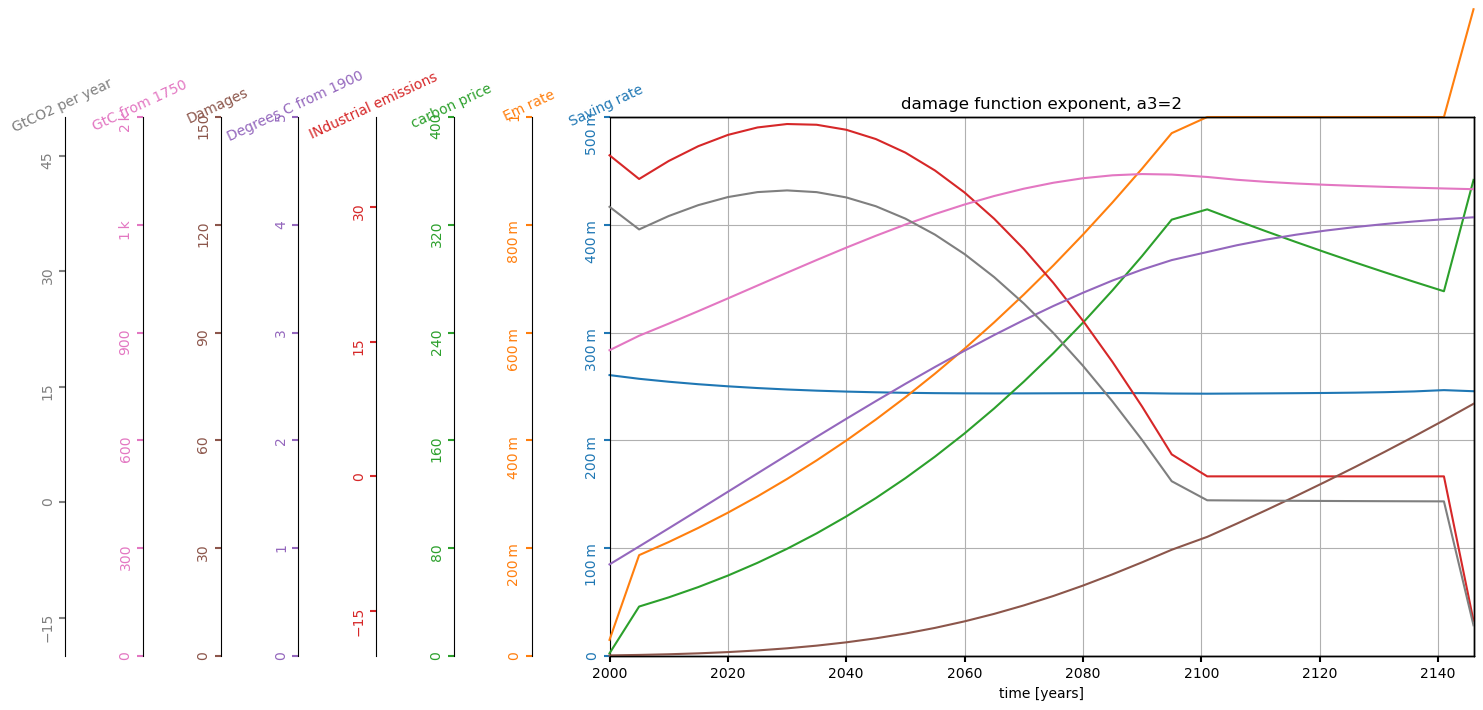

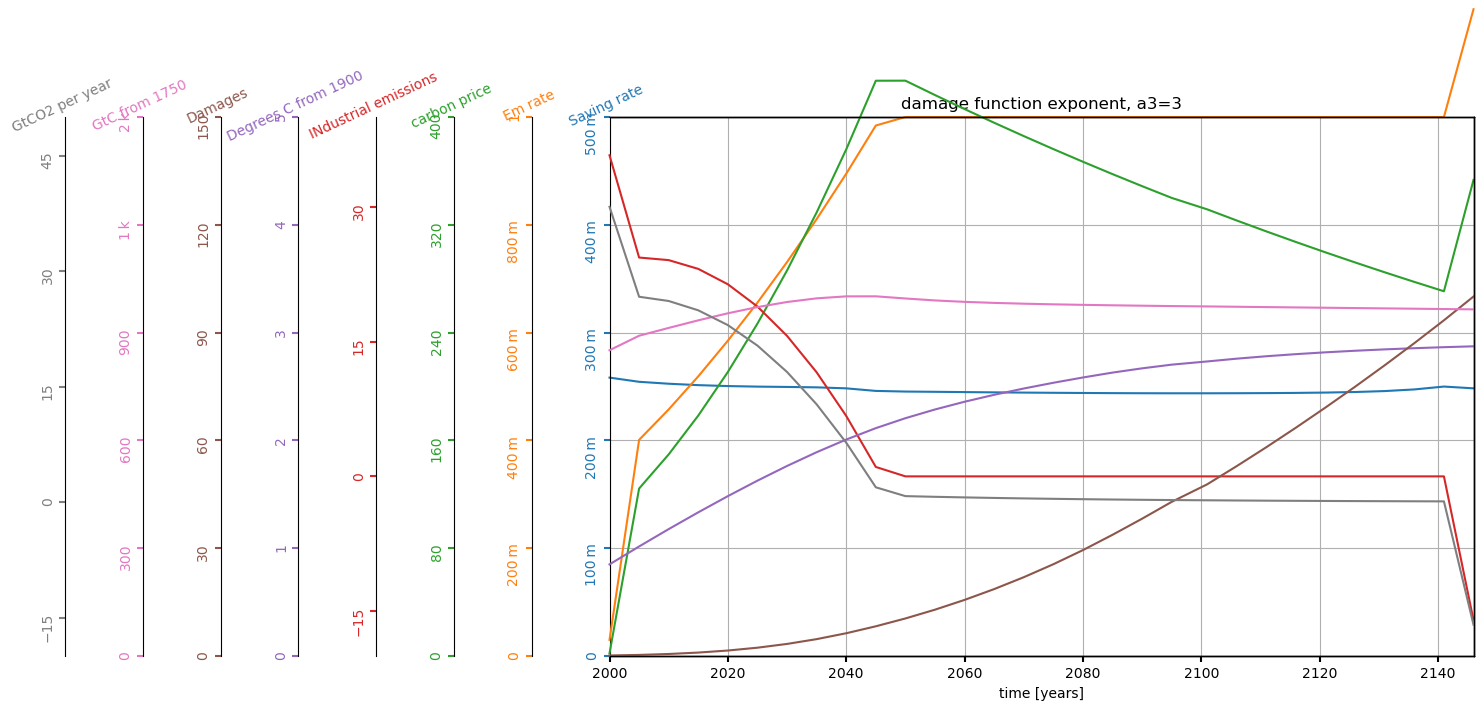

In [16]:
import dicelib  # This line assumes you have a module named dicelib that contains the DICE model implementation

# Initialize DICE model
for a3 in [2, 3]:
    dice = dicelib.DICE()
    dice.init_parameters(a3=a3)  # Initialize model parameters, including setting the damage function exponent
    dice.init_variables()  # Initialize model variables
    controls_start, controls_bounds = dice.get_control_bounds_and_startvalue()  # Get control variables' start values and bounds
    dice.optimize_controls(controls_start, controls_bounds)  # Optimize control variables
    dice.roll_out(dice.optimal_controls)  # Apply the optimized controls and roll out the model
    dice.plot_run("damage function exponent, a3=" + str(a3))  # Plot the model run
    inx = int((2100 - dice.min_year) / 5)  # Calculate the index for year 2100, assuming the model uses a 5-year timestep
    total_damages_2100 = dice.DAMAGES[inx]  # Extract total damages for the year 2100
    print(f"Total damages at year 2100 (a3={a3}): {total_damages_2100}")  # Print the total damages for the year 2100


## Question 2

Run the MAGICC model for the 4 main RCPs (2.6, 4.5, 7.0, 8.5). Plot the temperature of each pathway on (a single or seperate) graphs. Report out what is the expected temperature in 2100 for each RCP.

c:\Users\dyyan\miniforge3\envs\8222env1\Lib\site-packages\scmdata\database\_database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


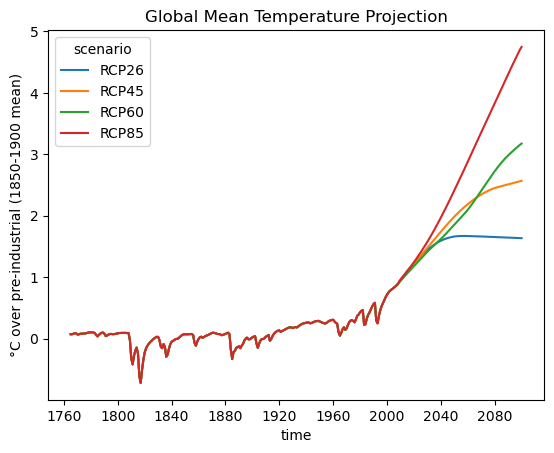

In [13]:
import matplotlib.pyplot as plt

import pymagicc
from pymagicc import rcps
import scmdata

results = []
for scen in rcps.groupby("scenario"):
    results_scen = pymagicc.run(scen)
    results.append(results_scen)

results = scmdata.run_append(results)

temperature_rel_to_1850_1900 = (
    results
    .filter(variable="Surface Temperature", region="World")
    .relative_to_ref_period_mean(year=range(1850, 1900 + 1))
)

temperature_rel_to_1850_1900.lineplot()
plt.title("Global Mean Temperature Projection")
plt.ylabel("°C over pre-industrial (1850-1900 mean)");
# Run `plt.show()` to display the plot when running this example
# interactively or add `%matplotlib inline` on top when in a Jupyter Notebook.


In [14]:
temperature_2100 = (
    temperature_rel_to_1850_1900
    .filter(year=2100)
    .values
)

# Define RCP scenario names
rcp_names = ["RCP 2.6", "RCP 4.5", "RCP 7.0", "RCP 8.5"]

# Print the predicted temperature value for the year 2100 for each RCP scenario
print("Predicted global mean temperature for 2100 (°C over pre-industrial)")
for i in range(len(temperature_2100)):
    print(rcp_names[i], "=", temperature_2100[i], "°C")


Predicted global mean temperature for 2100 (°C over pre-industrial)
RCP 2.6 = [1.63427534] °C
RCP 4.5 = [2.56807834] °C
RCP 7.0 = [3.17350514] °C
RCP 8.5 = [4.74703324] °C


## Question 3

The DICE version that we ran above is the 2016 version of Nordhaus' model. Recently, Nordhaus and team released a new version, documented in Barrage and Nordhaus (2023). Read the paper and compare it to what was in the 2016 version and summarize in 2-3 paragraphs what the main differences are with emphasis on explaining the technical differences (i.e., what coefficient changed and what were its new and old values). You may want to look through the code the Lint Barrange and William Nordhaus put online, which can be found here: https://yale.app.box.com/s/whlqcr7gtzdm4nxnrfhvap2hlzebuvvm

The main differences between the DICE-2023 model and the DICE-2016 version focus on several key areas, reflecting significant technical updates and revisions to the economic impact model of climate change.

Firstly, the DICE-2023 model adjusted the discount rate by lowering the pure rate of social time preference (ρ) from 0.015 to 0.010 and increasing the elasticity of marginal utility of consumption (σ) from 1.45 to 1.5. This change was aimed at reducing the real interest rate to reflect the recent decline in market interest rates. Consequently, the average discount rate from 2020 to 2100 was revised from 4.2% per year in the DICE-2016 model to 3.9% per year in the DICE-2023 model.

Secondly, the DICE-2023 model introduced the DFAIR module, which is a DICE version of the FAIR model representing the dynamics of the carbon cycle. This significant structural revision, especially in the treatment of the carbon cycle, marks a shift from the linear carbon cycle structure used in previous DICE and most other IAMs to a more complex dynamic model. Such a change allows the model to more accurately simulate the important phenomenon of the declining ability of non-atmospheric carbon sinks to absorb CO2 as emissions increase.

Moreover, the DICE-2023 model has undergone significant revisions in the treatment of greenhouse gas emissions. In previous versions, only industrial CO2 emissions were controllable (reducible), while other greenhouse gases and forcing agents were considered exogenous. The DICE-2023 version includes all "reducible" emissions in the endogenous category and excludes only a small portion of forcing as "irreducible emissions." This indicates that the DICE-2023 model gives a more comprehensive consideration to the greenhouse effect potential of other greenhouse gas sources, including land emissions, methane, and CFCs.
